<a href="https://colab.research.google.com/github/ohtopico/marketing-analytics/blob/main/email_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conhecendo o dataset

In [47]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
arq = 'base_crm.csv'
df = pd.read_csv(arq)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID do registro.                              773 non-null    int64  
 1   Data da última atividade                     717 non-null    object 
 2   Data de criação                              773 non-null    object 
 3   E-mail de marketing enviados                 414 non-null    float64
 4   E-mails de marketing entregues               395 non-null    float64
 5   E-mails de marketing abertos                 241 non-null    float64
 6   E-mails de marketing clicados                73 non-null     float64
 7   Número de formulários únicos enviados        773 non-null    int64  
 8   Número de sessões                            773 non-null    int64  
 9   Data de abertura de email de vendas recente  79 non-null     object 
 10  Ho

In [6]:
df.describe()

,ID do registro.,E-mail de marketing enviados,E-mails de marketing entregues,E-mails de marketing abertos,E-mails de marketing clicados,Número de formulários únicos enviados,Número de sessões,Número de visualizações de página
count,7.730000e+02,414.000000,395.000000,241.000000,73.000000,773.000000,773.000000,773.000000
mean,2.492887e+09,1.763285,1.800000,1.622407,1.219178,0.702458,1.706339,3.467012
std,4.270963e+09,0.842000,0.844811,0.818125,0.533505,0.568569,10.379480,36.107934
min,1.010000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4.778510e+05,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,7.154510e+05,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,5.811257e+09,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
max,1.584986e+10,6.000000,6.000000,6.000000,3.000000,3.000000,229.000000,904.000000


# Limpeza

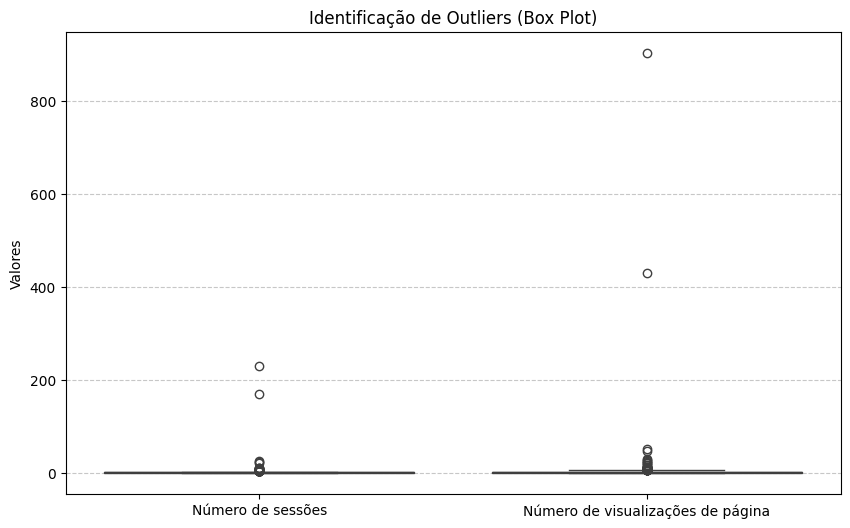

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

colunas_para_outliers = ['Número de sessões', 'Número de visualizações de página']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[colunas_para_outliers], orient='v')

plt.title('Identificação de Outliers (Box Plot)')
plt.ylabel('Valores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
colunas = ['Número de sessões', 'Número de visualizações de página']
df_copia = df.copy()
df_outliers = pd.DataFrame()

for coluna in colunas:
    Q1 = df_copia[coluna].quantile(0.25)
    Q3 = df_copia[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = 0
    limite_superior = 10

    media_sem_outliers = df_copia[(df_copia[coluna] >= limite_inferior) & (df_copia[coluna] <= limite_superior)][coluna].mean()

    print(f"--- Coluna: {coluna} ---")
    print(f"Limite Superior: {limite_superior:.2f}")
    print(f"Média para substituição: {media_sem_outliers:.2f}")
    print(f"--- Limites para '{coluna}' ---")
    print(f"Inferior: {limite_inferior:.2f} | Superior: {limite_superior:.2f}")

    condicao_outlier = (df_copia[coluna] > limite_superior) | (df_copia[coluna] < limite_inferior)
    linhas_outliers_coluna = df_copia[condicao_outlier]
    print(f"Total de outliers encontrados em '{coluna}': {len(linhas_outliers_coluna)}")
    df_outliers = pd.concat([df_outliers, linhas_outliers_coluna]).drop_duplicates()


# --- Exibindo o Resultado Final ---
print("\n\n LINHAS QUE CONTÊM OUTLIERS ")
print(df_outliers)
print(f"\nTotal de linhas únicas com pelo menos um outlier: {len(df_outliers)}")

--- Coluna: Número de sessões ---
Limite Superior: 10.00
Média para substituição: 1.09
--- Limites para 'Número de sessões' ---
Inferior: 0.00 | Superior: 10.00
Total de outliers encontrados em 'Número de sessões': 6
--- Coluna: Número de visualizações de página ---
Limite Superior: 10.00
Média para substituição: 1.29
--- Limites para 'Número de visualizações de página' ---
Inferior: 0.00 | Superior: 10.00
Total de outliers encontrados em 'Número de visualizações de página': 20


 LINHAS QUE CONTÊM OUTLIERS 
     ID do registro. Data da última atividade   Data de criação  \
0             769501         2024-04-27 13:00  2024-03-11 16:19   
8         5366438921         2024-04-27 13:00  2024-03-21 17:24   
36              4651         2023-12-24 04:49  2022-10-10 11:13   
337           722001         2024-03-09 12:00  2024-02-17 10:44   
490           639401         2024-04-27 13:00  2023-12-18 19:16   
494           263951         2023-02-14 10:02  2023-02-01 06:34   
2             656

In [29]:
# Selecionar e Substituir os Outliers

# Substituir valores acima do limite superior
for coluna in colunas:
  df_copia.loc[df_copia[coluna] > limite_superior, coluna] = media_sem_outliers

print(f"Substituídos outliers da coluna '{coluna}'.")


Substituídos outliers da coluna 'Número de visualizações de página'.


/tmp/ipython-input-431838792.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.2921646746347941' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copia.loc[df_copia[coluna] > limite_superior, coluna] = media_sem_outliers
/tmp/ipython-input-431838792.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.2921646746347941' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copia.loc[df_copia[coluna] > limite_superior, coluna] = media_sem_outliers


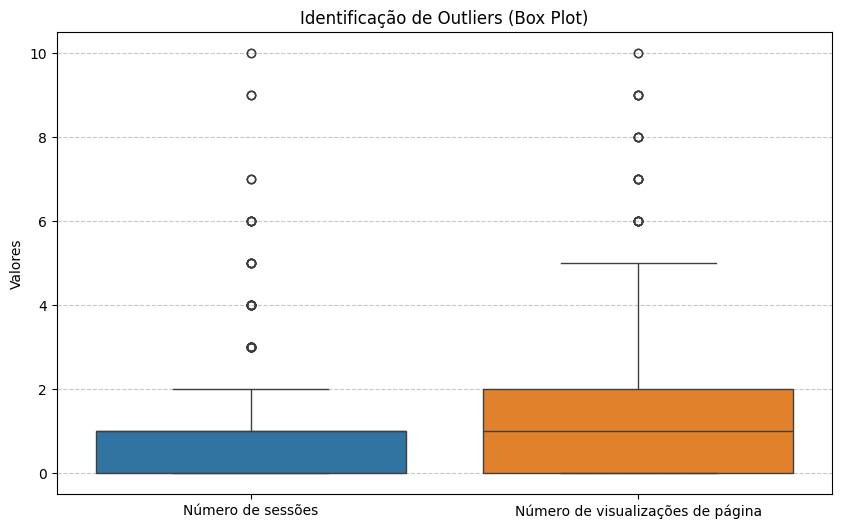

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copia[colunas], orient='v')

plt.title('Identificação de Outliers (Box Plot)')
plt.ylabel('Valores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Explorando os dados

In [36]:
# Verificação de emails: enviados, entregues, abertos e clicados
colunas_interesse = [
    'E-mail de marketing enviados',
    'E-mails de marketing entregues',
    'E-mails de marketing abertos',
    'E-mails de marketing clicados']

# Seleciona as colunas, verifica se é NaN e soma os resultados (True = 1)
contagem_nan = df[colunas_interesse].isna().sum()

# Exibe o resultado
print("Contagem de linhas com NaN para cada métrica:")
print(contagem_nan)

Contagem de linhas com NaN para cada métrica:
E-mail de marketing enviados      359
E-mails de marketing entregues    378
E-mails de marketing abertos      532
E-mails de marketing clicados     700
dtype: int64


In [39]:
(df[colunas_interesse].notna() & (df[colunas_interesse]>0)).sum()

,0
E-mail de marketing enviados,414
E-mails de marketing entregues,395
E-mails de marketing abertos,241
E-mails de marketing clicados,73


1. Taxa de entrega: 95,41%
2. Taxa de abertura: 61,01%
3. Taxa de cliques: 18,48%
4. Taxa de cliques por abertura: 30,29%

In [51]:
# Substitui todos os valores NaN (ausentes) por 0 em todo o DataFrame
df = df.fillna(0)

# Treinamento

In [52]:
# 1. Definir a condição de filtro: (Não é NaN) e (Maior que 0)
entregues = (df['E-mails de marketing entregues'].notna()) & (df['E-mails de marketing entregues'] > 0)

# 2. Criar o novo DataFrame aplicando a condição
df_treinamento = df[entregues].copy()
df_treinamento['Converteu'] = (df_treinamento['Número de formulários únicos enviados'] > 0).astype(int)

In [53]:
# Variáveis de entrada
features = [
    'Número de visualizações de página',
    'Número de sessões',
    'E-mail de marketing enviados',
    'E-mails de marketing entregues',
    'E-mails de marketing abertos',
    'E-mails de marketing clicados'
]

# Seleciona as colunas de entrada (X) e a coluna de saída (y)
X = df_treinamento[features]
y = df_treinamento['Converteu']

In [54]:
# Divide o conjunto em 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializa e treina o modelo
modelo_logistico = LogisticRegression(random_state=42, max_iter=1000)
modelo_logistico.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [55]:
# Faz previsões no conjunto de teste
y_pred = modelo_logistico.predict(X_test)

# Avalia o desempenho
precisao = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do Modelo (Accuracy): {precisao:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia do Modelo (Accuracy): 0.9832

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.98      1.00      0.99       104

    accuracy                           0.98       119
   macro avg       0.99      0.93      0.96       119
weighted avg       0.98      0.98      0.98       119



In [57]:
relevancia = pd.DataFrame({
    'Feature': features,
    'Coeficiente': modelo_logistico.coef_[0]
})

# Calcula a magnitude (valor absoluto) para ordenar
relevancia['Magnitude'] = relevancia['Coeficiente'].abs()

# Ordena pela Magnitude (do maior impacto para o menor)
relevancia_ordenada = relevancia.sort_values(by='Magnitude', ascending=False)

print("🏆 Ranking de Relevância das Features no Modelo Logístico:")
print(relevancia_ordenada)

🏆 Ranking de Relevância das Features no Modelo Logístico:
                             Feature  Coeficiente  Magnitude
1                  Número de sessões     3.044607   3.044607
0  Número de visualizações de página     1.632275   1.632275
2       E-mail de marketing enviados     0.598625   0.598625
3     E-mails de marketing entregues     0.598625   0.598625
4       E-mails de marketing abertos     0.504181   0.504181
5      E-mails de marketing clicados     0.024236   0.024236
